## Họ và tên: Sử Thành Công - Mã SV: 20E1020045

# A. Import libraries

In [1]:
import numpy as np 
import pandas as pd # Đọc file CSV, Làm việc với dataframe
import matplotlib.pyplot as plt # Sử dụng cho mục đích trực quan hóa dữ liệu
import seaborn as sns # Trực quan hóa dữ liệu
from scipy import stats as st # Kiểm định thống kê
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# B. Import Dataset

In [2]:
df = pd.read_csv('Diem.csv', sep=',')
df

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ
0,1,6.43,0.48,10,4,Nữ,Khác,2,43,2.25,0,2.04
1,2,5.45,0.81,123,102,Nam,Kinh,1,28,2.20,0,2.03
2,3,5.45,0.81,123,102,Nam,Kinh,2,43,1.60,0,2.09
3,4,5.66,0.88,119,42,Nam,Kinh,1,0,1.60,0,0.00
4,5,5.66,0.88,119,42,Nam,Kinh,2,14,1.29,0,1.78
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,8.18,0.75,177,53,Nam,Kinh,2,76,2.80,1,2.21
727,728,7.06,0.84,322,168,Nam,Kinh,1,27,2.20,0,2.44
728,729,7.06,0.84,322,168,Nam,Kinh,2,42,2.50,0,2.35
729,730,4.90,0.89,200,80,Nữ,Khác,1,0,2.50,0,0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mã SV             731 non-null    int64  
 1   Điểm TBTN         731 non-null    float64
 2   Tỉ lệ Văn/Toán    731 non-null    float64
 3   Tổng HS           731 non-null    int64  
 4   Hạng PT           731 non-null    int64  
 5   Giới tính         731 non-null    object 
 6   Dân tộc           731 non-null    object 
 7   Học kỳ            731 non-null    int64  
 8   Thời gian tự học  731 non-null    int64  
 9   Điểm giữa kỳ      731 non-null    float64
 10  Thể thao          731 non-null    int64  
 11  Điểm cuối kỳ      731 non-null    float64
dtypes: float64(4), int64(6), object(2)
memory usage: 68.7+ KB


**Nhận thấy:**
![title](maSV.png)
- Xét row1(Mã SV=2) và row2(Mã SV=3) có các trường: **'Điểm TBTN", 'Tỉ lệ Văn/Toán', 'Tổng HS', 'Hạng PT', 'Giới tính', 'Dân tộc', 'Thể Thao'** có dữ liệu giống nhau.
- Tương tự ở row3(Mã SV=4) và row4(Mã SV=5)
**=> Dữ liệu gồm kì 1 và kì 2 của cùng 1 sinh viên (mã sinh viên bị gấp đôi)**

- **Chuyển giá trị 0,1 ở cột "Thể thao" thành "Không" và "Có"**

In [4]:
df['Thể thao'].replace({0:'Không',1:'Có'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mã SV             731 non-null    int64  
 1   Điểm TBTN         731 non-null    float64
 2   Tỉ lệ Văn/Toán    731 non-null    float64
 3   Tổng HS           731 non-null    int64  
 4   Hạng PT           731 non-null    int64  
 5   Giới tính         731 non-null    object 
 6   Dân tộc           731 non-null    object 
 7   Học kỳ            731 non-null    int64  
 8   Thời gian tự học  731 non-null    int64  
 9   Điểm giữa kỳ      731 non-null    float64
 10  Thể thao          731 non-null    object 
 11  Điểm cuối kỳ      731 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 68.7+ KB


### Chỉnh sửa lại "Mã SV"

In [5]:
a=df
del a['Mã SV']
a

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ
0,6.43,0.48,10,4,Nữ,Khác,2,43,2.25,Không,2.04
1,5.45,0.81,123,102,Nam,Kinh,1,28,2.20,Không,2.03
2,5.45,0.81,123,102,Nam,Kinh,2,43,1.60,Không,2.09
3,5.66,0.88,119,42,Nam,Kinh,1,0,1.60,Không,0.00
4,5.66,0.88,119,42,Nam,Kinh,2,14,1.29,Không,1.78
...,...,...,...,...,...,...,...,...,...,...,...
726,8.18,0.75,177,53,Nam,Kinh,2,76,2.80,Có,2.21
727,7.06,0.84,322,168,Nam,Kinh,1,27,2.20,Không,2.44
728,7.06,0.84,322,168,Nam,Kinh,2,42,2.50,Không,2.35
729,4.90,0.89,200,80,Nữ,Khác,1,0,2.50,Không,0.00


## Feature Engineering:

### Tách Dataset theo 2 kỳ

**Dataset Kỳ 1:**

In [6]:
hk1 = a[a['Học kỳ'] == 1]
hk1['Mã SV'] = [var+2 for var in range(len(hk1))]
hk1

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ,Mã SV
1,5.45,0.81,123,102,Nam,Kinh,1,28,2.20,Không,2.03,2
3,5.66,0.88,119,42,Nam,Kinh,1,0,1.60,Không,0.00,3
5,7.55,0.80,318,31,Nam,Kinh,1,0,2.00,Không,0.00,4
7,6.71,1.00,383,66,Nam,Kinh,1,91,2.80,Không,2.35,5
9,5.52,1.14,44,27,Nam,Khác,1,0,1.29,Không,0.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
721,6.36,0.62,69,12,Nữ,Khác,1,0,2.80,Không,0.00,362
723,4.90,0.67,625,202,Nam,Khác,1,57,2.50,Không,2.05,363
725,8.18,0.75,177,53,Nam,Kinh,1,64,2.17,Có,2.21,364
727,7.06,0.84,322,168,Nam,Kinh,1,27,2.20,Không,2.44,365


**Dataset Kỳ 2:**

In [7]:
hk2 = a[a['Học kỳ'] == 2]
hk2['Mã SV']=[var+1 for var in range(len(hk2))]
hk2

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ,Mã SV
0,6.43,0.48,10,4,Nữ,Khác,2,43,2.25,Không,2.04,1
2,5.45,0.81,123,102,Nam,Kinh,2,43,1.60,Không,2.09,2
4,5.66,0.88,119,42,Nam,Kinh,2,14,1.29,Không,1.78,3
6,7.55,0.80,318,31,Nam,Kinh,2,17,2.73,Không,2.00,4
8,6.71,1.00,383,66,Nam,Kinh,2,106,2.60,Không,2.41,5
...,...,...,...,...,...,...,...,...,...,...,...,...
722,6.36,0.62,69,12,Nữ,Khác,2,18,2.63,Không,2.77,362
724,4.90,0.67,625,202,Nam,Khác,2,69,2.50,Không,2.13,363
726,8.18,0.75,177,53,Nam,Kinh,2,76,2.80,Có,2.21,364
728,7.06,0.84,322,168,Nam,Kinh,2,42,2.50,Không,2.35,365


### Gộp lại Dataset và reindex

In [8]:
df=hk2[['Mã SV','Điểm TBTN','Tỉ lệ Văn/Toán','Tổng HS','Hạng PT','Giới tính','Dân tộc','Thể thao']]
df=df.set_index('Mã SV')
df

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Thể thao
Mã SV,,,,,,,
1,6.43,0.48,10,4,Nữ,Khác,Không
2,5.45,0.81,123,102,Nam,Kinh,Không
3,5.66,0.88,119,42,Nam,Kinh,Không
4,7.55,0.80,318,31,Nam,Kinh,Không
5,6.71,1.00,383,66,Nam,Kinh,Không
...,...,...,...,...,...,...,...
362,6.36,0.62,69,12,Nữ,Khác,Không
363,4.90,0.67,625,202,Nam,Khác,Không
364,8.18,0.75,177,53,Nam,Kinh,Có


In [9]:
del hk1['Học kỳ']
# Đổi tên cột
hk1 = hk1.rename(columns={"Thời gian tự học": "Thời gian tự học HK1", "Điểm giữa kỳ": "Điểm giữa kỳ HK1",
                         'Điểm cuối kỳ':'Điểm cuối kỳ 1'})
hk1=hk1.set_index('Mã SV')
hk1

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Thời gian tự học HK1,Điểm giữa kỳ HK1,Thể thao,Điểm cuối kỳ 1
Mã SV,,,,,,,,,,
2,5.45,0.81,123,102,Nam,Kinh,28,2.20,Không,2.03
3,5.66,0.88,119,42,Nam,Kinh,0,1.60,Không,0.00
4,7.55,0.80,318,31,Nam,Kinh,0,2.00,Không,0.00
5,6.71,1.00,383,66,Nam,Kinh,91,2.80,Không,2.35
6,5.52,1.14,44,27,Nam,Khác,0,1.29,Không,0.00
...,...,...,...,...,...,...,...,...,...,...
362,6.36,0.62,69,12,Nữ,Khác,0,2.80,Không,0.00
363,4.90,0.67,625,202,Nam,Khác,57,2.50,Không,2.05
364,8.18,0.75,177,53,Nam,Kinh,64,2.17,Có,2.21


In [10]:
df = df.merge(hk1, how='left', on=['Mã SV','Điểm TBTN','Tỉ lệ Văn/Toán','Tổng HS','Hạng PT','Giới tính','Dân tộc','Thể thao'])
df

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Thể thao,Thời gian tự học HK1,Điểm giữa kỳ HK1,Điểm cuối kỳ 1
Mã SV,,,,,,,,,,
1,6.43,0.48,10,4,Nữ,Khác,Không,NaN,NaN,NaN
2,5.45,0.81,123,102,Nam,Kinh,Không,28.0,2.20,2.03
3,5.66,0.88,119,42,Nam,Kinh,Không,0.0,1.60,0.00
4,7.55,0.80,318,31,Nam,Kinh,Không,0.0,2.00,0.00
5,6.71,1.00,383,66,Nam,Kinh,Không,91.0,2.80,2.35
...,...,...,...,...,...,...,...,...,...,...
362,6.36,0.62,69,12,Nữ,Khác,Không,0.0,2.80,0.00
363,4.90,0.67,625,202,Nam,Khác,Không,57.0,2.50,2.05
364,8.18,0.75,177,53,Nam,Kinh,Có,64.0,2.17,2.21


In [11]:
del hk2['Học kỳ']
# Đổi tên cột
hk2 = hk2.rename(columns={"Thời gian tự học": "Thời gian tự học HK2", "Điểm giữa kỳ": "Điểm giữa kỳ HK2",
                         'Điểm cuối kỳ':'Điểm cuối kỳ 2'})
hk2

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Thời gian tự học HK2,Điểm giữa kỳ HK2,Thể thao,Điểm cuối kỳ 2,Mã SV
0,6.43,0.48,10,4,Nữ,Khác,43,2.25,Không,2.04,1
2,5.45,0.81,123,102,Nam,Kinh,43,1.60,Không,2.09,2
4,5.66,0.88,119,42,Nam,Kinh,14,1.29,Không,1.78,3
6,7.55,0.80,318,31,Nam,Kinh,17,2.73,Không,2.00,4
8,6.71,1.00,383,66,Nam,Kinh,106,2.60,Không,2.41,5
...,...,...,...,...,...,...,...,...,...,...,...
722,6.36,0.62,69,12,Nữ,Khác,18,2.63,Không,2.77,362
724,4.90,0.67,625,202,Nam,Khác,69,2.50,Không,2.13,363
726,8.18,0.75,177,53,Nam,Kinh,76,2.80,Có,2.21,364
728,7.06,0.84,322,168,Nam,Kinh,42,2.50,Không,2.35,365


In [12]:
df = df.merge(hk2, how='left', on=['Mã SV','Điểm TBTN','Tỉ lệ Văn/Toán','Tổng HS','Hạng PT','Giới tính','Dân tộc','Thể thao'])
df=df.set_index('Mã SV')
df.head()

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Thể thao,Thời gian tự học HK1,Điểm giữa kỳ HK1,Điểm cuối kỳ 1,Thời gian tự học HK2,Điểm giữa kỳ HK2,Điểm cuối kỳ 2
Mã SV,,,,,,,,,,,,,
1,6.43,0.48,10,4,Nữ,Khác,Không,NaN,NaN,NaN,43,2.25,2.04
2,5.45,0.81,123,102,Nam,Kinh,Không,28.0,2.2,2.03,43,1.60,2.09
3,5.66,0.88,119,42,Nam,Kinh,Không,0.0,1.6,0.00,14,1.29,1.78
4,7.55,0.80,318,31,Nam,Kinh,Không,0.0,2.0,0.00,17,2.73,2.00
5,6.71,1.00,383,66,Nam,Kinh,Không,91.0,2.8,2.35,106,2.60,2.41


**Handle Missing Value:**

- Kiểm tra xem cột nào thiếu dữ liệu:

In [13]:
na_cols = df.isnull().any().loc[df.isnull().any().values == True].index
na_cols

Index(['Thời gian tự học HK1', 'Điểm giữa kỳ HK1', 'Điểm cuối kỳ 1'], dtype='object')

- Điền các giá trị yếu vị của cột tương ứng vào những vị trí thiếu dữ liệu:

In [14]:
for i in na_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)
df.head()

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Thể thao,Thời gian tự học HK1,Điểm giữa kỳ HK1,Điểm cuối kỳ 1,Thời gian tự học HK2,Điểm giữa kỳ HK2,Điểm cuối kỳ 2
Mã SV,,,,,,,,,,,,,
1,6.43,0.48,10,4,Nữ,Khác,Không,0.0,2.0,0.00,43,2.25,2.04
2,5.45,0.81,123,102,Nam,Kinh,Không,28.0,2.2,2.03,43,1.60,2.09
3,5.66,0.88,119,42,Nam,Kinh,Không,0.0,1.6,0.00,14,1.29,1.78
4,7.55,0.80,318,31,Nam,Kinh,Không,0.0,2.0,0.00,17,2.73,2.00
5,6.71,1.00,383,66,Nam,Kinh,Không,91.0,2.8,2.35,106,2.60,2.41


# C. Exploratory data analysis (EDA)

**Kích thước dữ liệu:**

In [15]:
df.shape

(366, 13)

**Kiểm tra kiểu dữ liệu:**

In [16]:
df['Thời gian tự học HK2']=df['Thời gian tự học HK2'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 1 to 366
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Điểm TBTN             366 non-null    float64
 1   Tỉ lệ Văn/Toán        366 non-null    float64
 2   Tổng HS               366 non-null    int64  
 3   Hạng PT               366 non-null    int64  
 4   Giới tính             366 non-null    object 
 5   Dân tộc               366 non-null    object 
 6   Thể thao              366 non-null    object 
 7   Thời gian tự học HK1  366 non-null    float64
 8   Điểm giữa kỳ HK1      366 non-null    float64
 9   Điểm cuối kỳ 1        366 non-null    float64
 10  Thời gian tự học HK2  366 non-null    float64
 11  Điểm giữa kỳ HK2      366 non-null    float64
 12  Điểm cuối kỳ 2        366 non-null    float64
dtypes: float64(8), int64(2), object(3)
memory usage: 40.0+ KB


### Biến định tính và biến định lượng

In [17]:
# Phân loại biến định tính:

categorical = [var for var in df.columns if df[var].dtype=='O']
print('Có {} biến định tính.'.format(len(categorical)))
print('Các biến định tính là :', categorical)
print('_'*20)

# Phân loại biến định lượng:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('Có {} biến định lượng gồm:'.format(len(numerical)))

numerical_float = [var for var in df.columns if df[var].dtype=='float']
print('  -{} biến định lượng (float):'.format(len(numerical_float)))
print('Các biến định lượng (float) là :', numerical_float)
print('-'*5)

numerical_int = [var for var in df.columns if df[var].dtype=='int64']
print('  -{} biến định lượng (int):'.format(len(numerical_int)))
print('Các biến định lượng (int) là :', numerical_int)

Có 3 biến định tính.
Các biến định tính là : ['Giới tính', 'Dân tộc', 'Thể thao']
____________________
Có 10 biến định lượng gồm:
  -8 biến định lượng (float):
Các biến định lượng (float) là : ['Điểm TBTN', 'Tỉ lệ Văn/Toán', 'Thời gian tự học HK1', 'Điểm giữa kỳ HK1', 'Điểm cuối kỳ 1', 'Thời gian tự học HK2', 'Điểm giữa kỳ HK2', 'Điểm cuối kỳ 2']
-----
  -2 biến định lượng (int):
Các biến định lượng (int) là : ['Tổng HS', 'Hạng PT']


### 1. Phân tích biến định tính

In [18]:
# Xem biến định tính:
df[categorical]

,Giới tính,Dân tộc,Thể thao
Mã SV,,,
1,Nữ,Khác,Không
2,Nam,Kinh,Không
3,Nam,Kinh,Không
4,Nam,Kinh,Không
5,Nam,Kinh,Không
...,...,...,...
362,Nữ,Khác,Không
363,Nam,Khác,Không
364,Nam,Kinh,Có


In [19]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Giới tính  contains  2  labels
Dân tộc  contains  2  labels
Thể thao  contains  2  labels


In [20]:
for var in categorical: 
    print(df[var].value_counts())

Nam    276
Nữ      90
Name: Giới tính, dtype: int64
Kinh    277
Khác     89
Name: Dân tộc, dtype: int64
Không    247
Có       119
Name: Thể thao, dtype: int64


***a. Biến "Giới tính":***

In [21]:
gender = pd.DataFrame(df['Giới tính'].value_counts())
gender['Phần trăm'] = df['Giới tính'].value_counts()*100/np.float(len(df))
gender.reset_index(inplace=True)
gender.columns = ['Giới tính','Số lượng', 'Phần trăm']
gender

,Giới tính,Số lượng,Phần trăm
0,Nam,276,75.409836
1,Nữ,90,24.590164


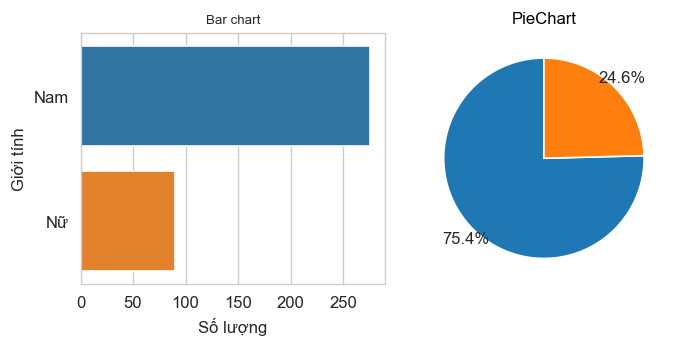

In [22]:
sns.set_style("whitegrid")
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (6,3))
# Barplot:
plot0=sns.barplot(x='Số lượng',y='Giới tính',data = gender, ax=axes[0])
axes[0].set_title('Bar chart',fontdict={'fontsize':8})
axes[0].set_xlabel('Số lượng',fontdict={'fontsize':10})
axes[0].set_ylabel('Giới tính',fontdict={'fontsize':10})
plt.tight_layout()

# Piechart:
df_pie=gender['Phần trăm'].values.tolist()
pie=plt.pie(df_pie, autopct = '%1.1f%%', startangle = 90, pctdistance = 1.12)
plt.title('PieChart', color = 'black', y = 1.1, fontsize = 10)
plt.tight_layout()


***b. Biến "Dân tộc":***

In [23]:
ethnic = pd.DataFrame(df['Dân tộc'].value_counts())
ethnic['Phần trăm'] = df['Dân tộc'].value_counts()*100/np.float(len(df))
ethnic.reset_index(inplace=True)
ethnic.columns = ['Dân tộc','Số lượng', 'Phần trăm']
ethnic

,Dân tộc,Số lượng,Phần trăm
0,Kinh,277,75.68306
1,Khác,89,24.31694


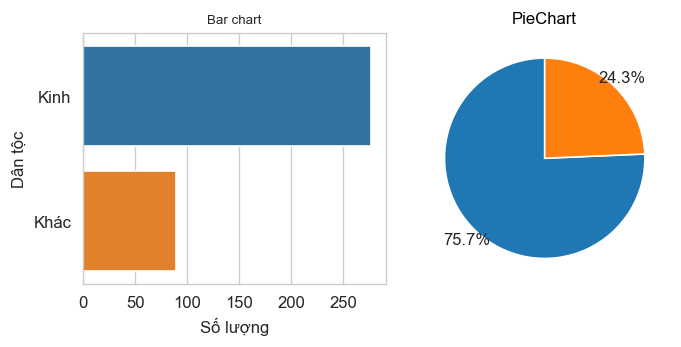

In [24]:
sns.set_style("whitegrid")
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (6,3))
# Barplot:
plot0=sns.barplot(x='Số lượng',y='Dân tộc',data = ethnic, ax=axes[0])
axes[0].set_title('Bar chart',fontdict={'fontsize':8})
axes[0].set_xlabel('Số lượng',fontdict={'fontsize':10})
axes[0].set_ylabel('Dân tộc',fontdict={'fontsize':10})
plt.tight_layout()

# Piechart:
df_pie=ethnic['Phần trăm'].values.tolist()
pie=plt.pie(df_pie, autopct = '%1.1f%%', startangle = 90, pctdistance = 1.12)
plt.title('PieChart', color = 'black', y = 1.1, fontsize = 10)
plt.tight_layout()


***c. Biến "Thể thao":***

In [25]:
sport = pd.DataFrame(df['Thể thao'].value_counts())
sport['Phần trăm'] = df['Thể thao'].value_counts()*100/np.float(len(df))
sport.reset_index(inplace=True)
sport.columns = ['Thể thao','Số lượng', 'Phần trăm']
sport

,Thể thao,Số lượng,Phần trăm
0,Không,247,67.486339
1,Có,119,32.513661


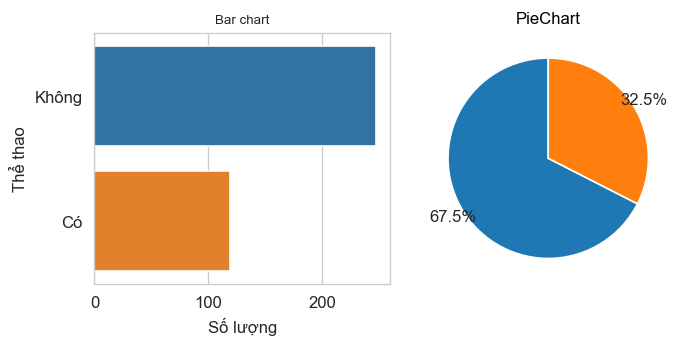

In [26]:
sns.set_style("whitegrid")
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (6,3))
# Barplot:
plot0=sns.barplot(x='Số lượng',y='Thể thao',data = sport, ax=axes[0], orient='h')
axes[0].set_title('Bar chart',fontdict={'fontsize':8})
axes[0].set_xlabel('Số lượng',fontdict={'fontsize':10})
axes[0].set_ylabel('Thể thao',fontdict={'fontsize':10})
plt.tight_layout()

# Piechart:
df_pie=sport['Phần trăm'].values.tolist()
pie=plt.pie(df_pie, autopct = '%1.1f%%', startangle = 90, pctdistance = 1.12)
plt.title('PieChart', color = 'black', y = 1.1, fontsize = 10)
plt.tight_layout()


### 2. Phân tích biến định lượng (Float)

In [27]:
# Xem biến định lượng:
df[numerical_float].head()

,Điểm TBTN,Tỉ lệ Văn/Toán,Thời gian tự học HK1,Điểm giữa kỳ HK1,Điểm cuối kỳ 1,Thời gian tự học HK2,Điểm giữa kỳ HK2,Điểm cuối kỳ 2
Mã SV,,,,,,,,
1,6.43,0.48,0.0,2.0,0.00,43.0,2.25,2.04
2,5.45,0.81,28.0,2.2,2.03,43.0,1.60,2.09
3,5.66,0.88,0.0,1.6,0.00,14.0,1.29,1.78
4,7.55,0.80,0.0,2.0,0.00,17.0,2.73,2.00
5,6.71,1.00,91.0,2.8,2.35,106.0,2.60,2.41


#### The Central Tendency

***a. Giá trị trung bình của các biến định lượng (Float):***

In [28]:
pd.DataFrame(df[numerical_float].mean())

,0
Điểm TBTN,6.283743
Tỉ lệ Văn/Toán,0.854290
Thời gian tự học HK1,39.964481
Điểm giữa kỳ HK1,2.323770
Điểm cuối kỳ 1,1.821421
Thời gian tự học HK2,54.030055
Điểm giữa kỳ HK2,2.338087
Điểm cuối kỳ 2,2.334153


***b. Phương sai của các biến định lượng:***

In [29]:
pd.DataFrame(df[numerical_float].var())

,0
Điểm TBTN,1.382699
Tỉ lệ Văn/Toán,0.023789
Thời gian tự học HK1,1193.897365
Điểm giữa kỳ HK1,0.553741
Điểm cuối kỳ 1,1.479972
Thời gian tự học HK2,1181.788135
Điểm giữa kỳ HK2,0.596064
Điểm cuối kỳ 2,0.361353


***c. Độ lệch chuẩn của các biến định lượng:***

In [30]:
pd.DataFrame(df[numerical_float].std())

,0
Điểm TBTN,1.175882
Tỉ lệ Văn/Toán,0.154237
Thời gian tự học HK1,34.552820
Điểm giữa kỳ HK1,0.744138
Điểm cuối kỳ 1,1.216541
Thời gian tự học HK2,34.377146
Điểm giữa kỳ HK2,0.772052
Điểm cuối kỳ 2,0.601126


***d. Giá trị trung vị của các biến định lượng***

In [31]:
pd.DataFrame(df[numerical_float].median())

,0
Điểm TBTN,6.290
Tỉ lệ Văn/Toán,0.835
Thời gian tự học HK1,33.000
Điểm giữa kỳ HK1,2.330
Điểm cuối kỳ 1,2.080
Thời gian tự học HK2,47.000
Điểm giữa kỳ HK2,2.380
Điểm cuối kỳ 2,2.250


***e. Yếu vị (Mod):***

In [32]:
pd.DataFrame(df[numerical_float].mode()).T

,0,1
Điểm TBTN,5.73,5.94
Tỉ lệ Văn/Toán,0.80,NaN
Thời gian tự học HK1,0.00,NaN
Điểm giữa kỳ HK1,2.00,NaN
Điểm cuối kỳ 1,0.00,NaN
Thời gian tự học HK2,15.00,NaN
Điểm giữa kỳ HK2,3.00,NaN
Điểm cuối kỳ 2,2.00,NaN


***f. Bảng thống kê tóm tắt***

In [33]:
df[numerical_float].describe().T

,count,mean,std,min,25%,50%,75%,max
Điểm TBTN,366.0,6.283743,1.175882,3.15,5.5200,6.290,7.1125,10.00
Tỉ lệ Văn/Toán,366.0,0.854290,0.154237,0.46,0.7500,0.835,0.9375,1.42
Thời gian tự học HK1,366.0,39.964481,34.552820,0.00,0.0000,33.000,65.0000,121.00
Điểm giữa kỳ HK1,366.0,2.323770,0.744138,0.00,1.8350,2.330,2.8275,4.00
Điểm cuối kỳ 1,366.0,1.821421,1.216541,0.00,0.0000,2.080,2.6375,4.00
Thời gian tự học HK2,366.0,54.030055,34.377146,10.00,16.2500,47.000,79.0000,134.00
Điểm giữa kỳ HK2,366.0,2.338087,0.772052,0.00,1.8525,2.380,2.8450,4.00
Điểm cuối kỳ 2,366.0,2.334153,0.601126,0.00,1.9700,2.250,2.7100,4.00


***g. Histplot***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001513BC80880>,
      dtype=object)

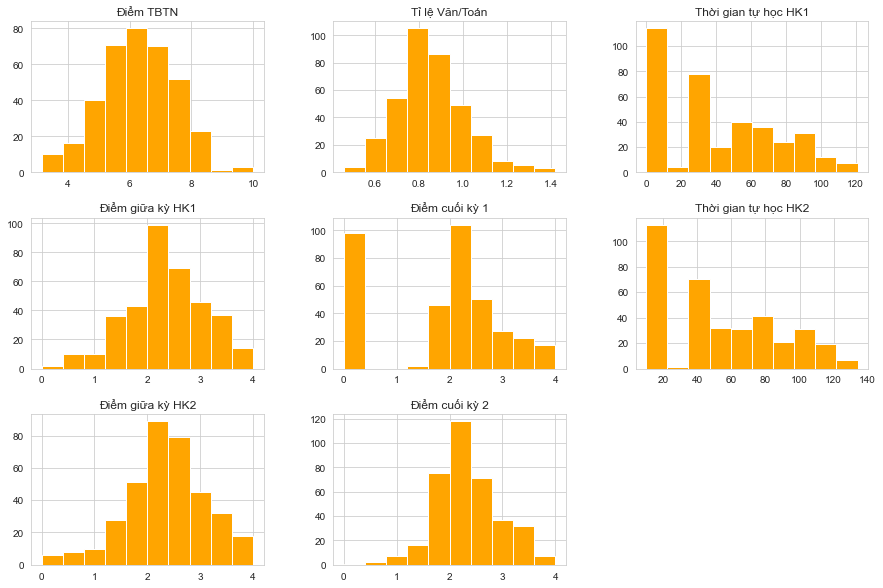

In [34]:
df[numerical_float].hist(figsize=(15,10), color='orange')

***i. Coefficient of variation - Ma trận biểu diễn hệ số tương quan***

In [35]:
corr = df[numerical_float].corr(method = "pearson")
corr

,Điểm TBTN,Tỉ lệ Văn/Toán,Thời gian tự học HK1,Điểm giữa kỳ HK1,Điểm cuối kỳ 1,Thời gian tự học HK2,Điểm giữa kỳ HK2,Điểm cuối kỳ 2
Điểm TBTN,1.000000,-0.082996,-0.135374,0.468213,0.024433,-0.123205,0.520152,0.449494
Tỉ lệ Văn/Toán,-0.082996,1.000000,-0.115538,-0.062685,-0.108966,-0.123385,-0.055568,-0.103292
Thời gian tự học HK1,-0.135374,-0.115538,1.000000,0.072652,0.549712,0.997058,0.045527,0.115050
Điểm giữa kỳ HK1,0.468213,-0.062685,0.072652,1.000000,0.207948,0.088448,0.638238,0.864149
Điểm cuối kỳ 1,0.024433,-0.108966,0.549712,0.207948,1.000000,0.549054,0.193222,0.311630
Thời gian tự học HK2,-0.123205,-0.123385,0.997058,0.088448,0.549054,1.000000,0.063930,0.130697
Điểm giữa kỳ HK2,0.520152,-0.055568,0.045527,0.638238,0.193222,0.063930,1.000000,0.645235
Điểm cuối kỳ 2,0.449494,-0.103292,0.115050,0.864149,0.311630,0.130697,0.645235,1.000000


Trực quan hóa:

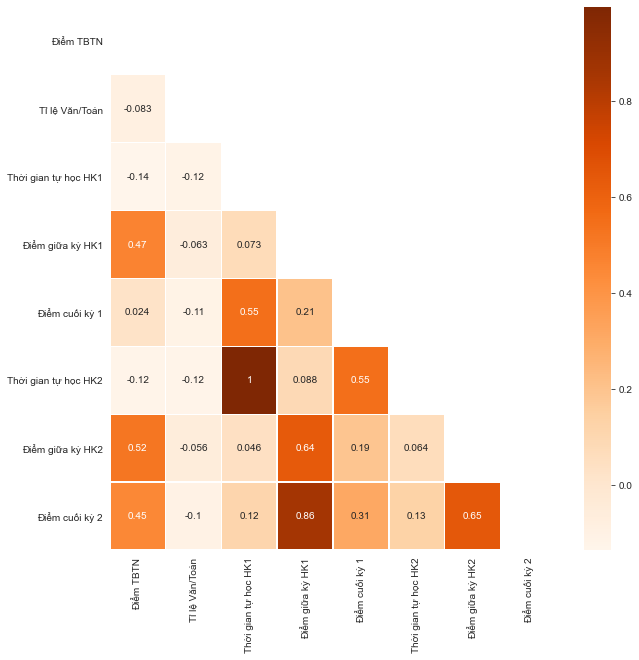

In [36]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax=sns.heatmap(corr, annot=True, mask=mask, cmap='Oranges', linewidths=0.5, linecolor='white')

***pairplot***

Thêm biến `Giới tính` so sánh

In [37]:
numerical_float.append('Giới tính')

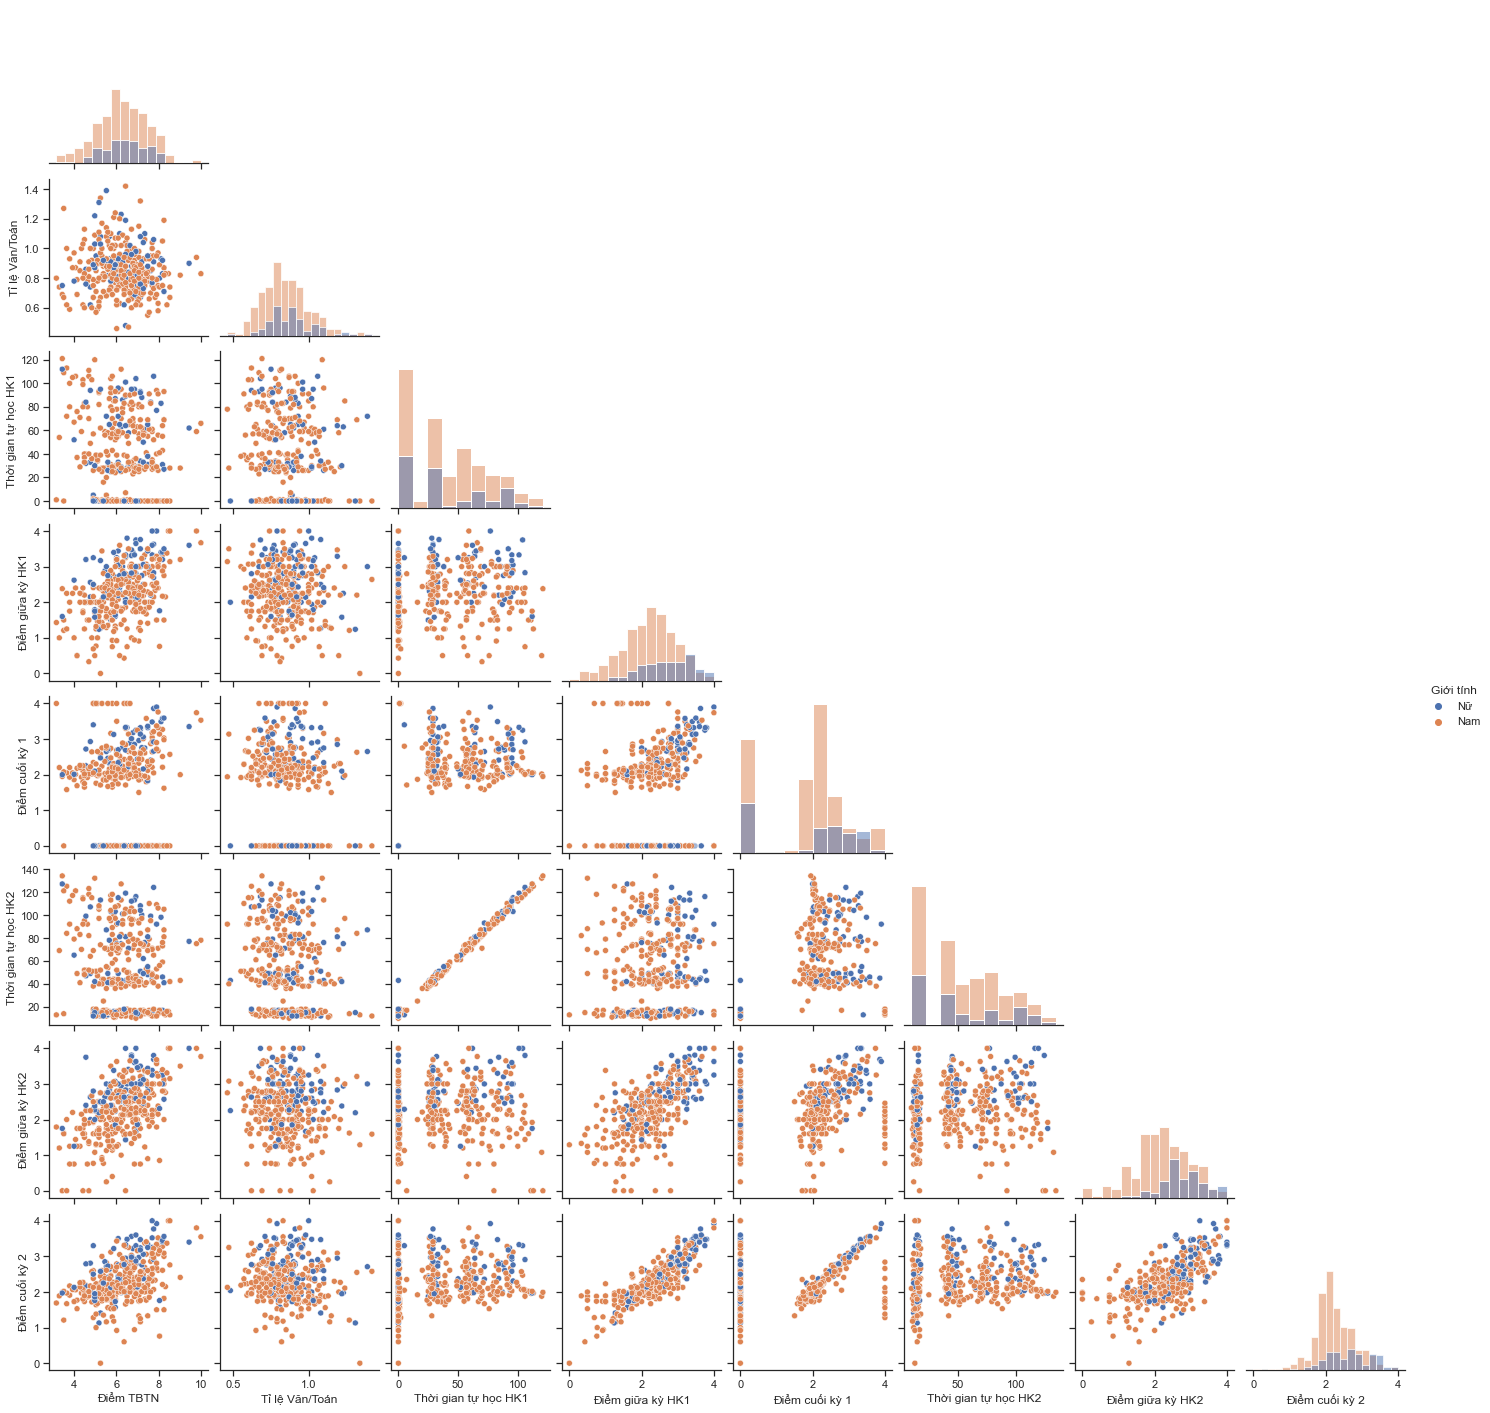

<Figure size 576x576 with 0 Axes>

<Figure size 120x80 with 0 Axes>

In [38]:
sns.set_theme(style="ticks")
sns.color_palette("hls", 8)
sns.pairplot(df[numerical_float], corner=True, hue="Giới tính",diag_kind="hist")
plt.figure(figsize=(8,8))
plt.figure(dpi=20)
plt.show()

# D. Phân tích mối quan hệ giữa các biến

## I. T-test

Phương pháp t-test được dùng một cách phổ biến để xác định xem liệu giá trị trung bình của một quần thể (the mean of a population) có khác biệt với một giá trị nào đó (gọi là giá trị trung bình giả thuyết – a hypothesized mean) hoặc với giá trị trung bình của một quần thể khác.

### 1.So sánh điểm trung bình cuối kỳ của sinh viên theo giới tính:

In [39]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

#### Sử dụng T-test:

Phát biểu giả thiết:

$H_0$: Điểm trung bình cuối kỳ giữa Nam và Nữ bằng nhau

$H_1$: Điểm trung bình cuối kỳ giữa Nam và Nữ khác nhau

**Tạo dataset mới từ dataframe gốc:**

Lấy mẫu mỗi nhóm (size=30):

In [40]:
male=df[df['Giới tính']=='Nam']
female=df[df['Giới tính']=='Nữ']
female=female[['Giới tính','Điểm cuối kỳ 1','Điểm cuối kỳ 2']].sample(30)
gender=male[['Giới tính','Điểm cuối kỳ 1','Điểm cuối kỳ 2']].sample(30)
gender=pd.concat([female, gender])
gender.head()

,Giới tính,Điểm cuối kỳ 1,Điểm cuối kỳ 2
Mã SV,,,
328,Nữ,2.47,2.58
223,Nữ,0.00,3.25
166,Nữ,0.00,2.43
132,Nữ,2.96,2.97
234,Nữ,0.00,2.78


**a. HK1:**

**H0**: $\mu_{Nam} = \mu_{Nữ}$ - 

**H1:** $\mu_{Nam} \ne \mu_{Nữ}$

In [41]:
gr1 = gender[gender['Giới tính']=='Nam']['Điểm cuối kỳ 1']
gr1.name='Nam'
gr2 = gender[gender['Giới tính']=='Nữ']['Điểm cuối kỳ 1']
gr2.name='Nữ'
pd.concat([gr1, gr2], axis=1).head()

,Nam,Nữ
Mã SV,,
7,NaN,2.12
15,2.00,NaN
25,NaN,2.70
41,2.61,NaN
44,2.25,NaN


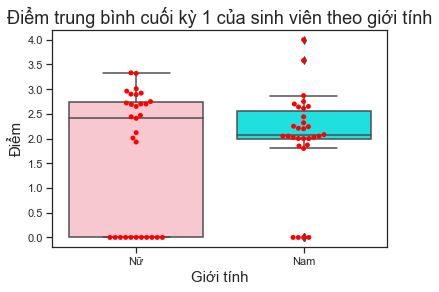

In [42]:
g=sns.boxplot(x='Giới tính', y='Điểm cuối kỳ 1', data=gender, palette=['pink','cyan'])
sns.swarmplot(x="Giới tính", y="Điểm cuối kỳ 1", data=gender, color='red')
plt.title('Điểm trung bình cuối kỳ 1 của sinh viên theo giới tính', size=18)
plt.xlabel('Giới tính',fontsize=15)
plt.ylabel('Điểm',fontsize=15)
plt.show()

In [43]:
p = {}
p['mean1'] = np.mean(gr1)
p['mean2'] = np.mean(gr2)
p['score'], p['p_value'] = st.ttest_ind(gr1, gr2,equal_var=False)
print('Kiểm định t test 2 tail')
results(p)

Kiểm định t test 2 tail


,mean1,mean2,score,p_value,KetLuan
,2.042,1.697333,1.14548,0.257251,Chấp nhận H0 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, `Điểm trung bình cuối kỳ 1` giữa `Nam` và `Nữ` bằng nhau với mức ý nghĩa 5%.

**b. HK2:**

**H0**: $\mu_{Nam} = \mu_{Nữ}$ - 

**H1:** $\mu_{Nam} \ne \mu_{Nữ}$

In [44]:
gr1 = gender[gender['Giới tính']=='Nam']['Điểm cuối kỳ 2']
gr1.name='Nam'
gr2 = gender[gender['Giới tính']=='Nữ']['Điểm cuối kỳ 2']
gr2.name='Nữ'

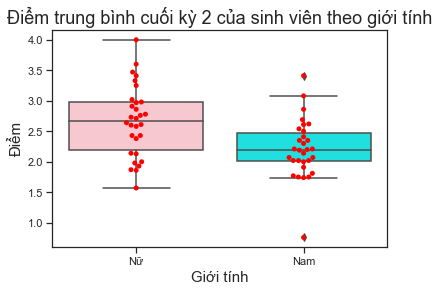

In [45]:
g=sns.boxplot(x='Giới tính', y='Điểm cuối kỳ 2', data=gender, palette=['pink','cyan'])
sns.swarmplot(x="Giới tính", y="Điểm cuối kỳ 2", data=gender, color='red')
plt.title('Điểm trung bình cuối kỳ 2 của sinh viên theo giới tính', size=18)
plt.xlabel('Giới tính',fontsize=15)
plt.ylabel('Điểm',fontsize=15)
plt.show()

In [46]:
p = {}
p['mean1'] = np.mean(gr1)
p['mean2'] = np.mean(gr2)
p['score'], p['p_value'] = st.ttest_ind(gr1, gr2,equal_var=False)
print('Kiểm định t test 2 tail')
results(p)

Kiểm định t test 2 tail


,mean1,mean2,score,p_value,KetLuan
,2.212,2.664333,-3.271354,0.001831,Chấp nhận H1 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, `Điểm trung bình cuối kỳ 2` giữa `Nam` và `Nữ` khác nhau với mức ý nghĩa 5%.

### 2.So sánh điểm trung bình cuối kỳ của sinh viên theo Thể thao:


#### Sử dụng T-test:

Phát biểu giả thiết:

$H_0$: Điểm trung bình cuối kỳ giữa nhóm "Chơi thể thao" và "Không chơi thể thao" bằng nhau

$H_1$: Điểm trung bình cuối kỳ giữa nhóm "Chơi thể thao" và "Không chơi thể thao" khác nhau

In [47]:
sport=df[df['Thể thao']=='Không'].sample(30)
y=df[df['Thể thao']=='Có'].sample(30)
y=y[['Thể thao','Điểm cuối kỳ 1','Điểm cuối kỳ 2']]
sport=sport[['Thể thao','Điểm cuối kỳ 1','Điểm cuối kỳ 2']]
sport=pd.concat([sport, y])
sport.head()

,Thể thao,Điểm cuối kỳ 1,Điểm cuối kỳ 2
Mã SV,,,
73,Không,2.75,3.00
45,Không,2.67,2.61
223,Không,0.00,3.25
271,Không,2.46,2.53
29,Không,0.00,2.15


**a. HK1:**

**H0**: $\mu_{Có} = \mu_{Không}$

**H1:** $\mu_{Có} \ne \mu_{Không}$

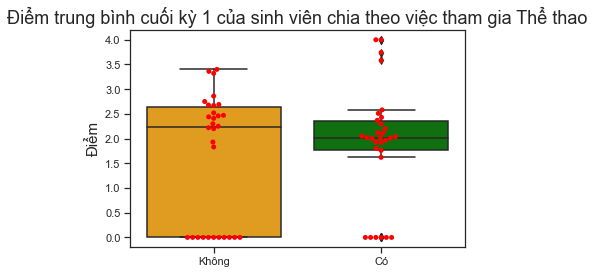

In [48]:
g=sns.boxplot(x='Thể thao', y='Điểm cuối kỳ 1', data=sport, palette=['orange','green'])
sns.swarmplot(x="Thể thao", y="Điểm cuối kỳ 1", data=sport, color='red')
plt.title('Điểm trung bình cuối kỳ 1 của sinh viên chia theo việc tham gia Thể thao', size=18)
plt.xlabel('')
plt.ylabel('Điểm',fontsize=15)
plt.show()

In [49]:
gr1 = sport[sport['Thể thao']=='Không']['Điểm cuối kỳ 1']
gr1.name='Không'
gr2 = sport[sport['Thể thao']=='Có']['Điểm cuối kỳ 1']
gr2.name='Có'

In [50]:
p = {}
p['mean1'] = np.mean(gr1)
p['mean2'] = np.mean(gr2)
p['score'], p['p_value'] = st.ttest_ind(gr1, gr2,equal_var=False)
print('Kiểm định t test 2 tail')
results(p)

Kiểm định t test 2 tail


,mean1,mean2,score,p_value,KetLuan
,1.625333,1.902667,-0.872289,0.386702,Chấp nhận H0 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, `Điểm trung bình cuối kỳ 1` giữa nhóm `"Chơi thể thao"` và `"Không chơi thể thao"` bằng nhau với mức ý nghĩa 5%.

**b. HK2:**

**H0**: $\mu_{Có} = \mu_{Không}$

**H1:** $\mu_{Có} \ne \mu_{Không}$

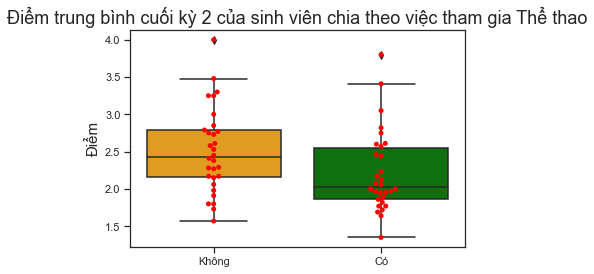

In [51]:
g=sns.boxplot(x='Thể thao', y='Điểm cuối kỳ 2', data=sport, palette=['orange','green'])
sns.swarmplot(x="Thể thao", y="Điểm cuối kỳ 2", data=sport, color='red')
plt.title('Điểm trung bình cuối kỳ 2 của sinh viên chia theo việc tham gia Thể thao', size=18)
plt.xlabel('')
plt.ylabel('Điểm',fontsize=15)
plt.show()

In [52]:
gr1 = df[df['Thể thao']=='Không']['Điểm cuối kỳ 2']
gr1.name='Không chơi thể thao'
m1 = np.mean(gr1)
gr2 = df[df['Thể thao']=='Có']['Điểm cuối kỳ 2']
gr2.name='Chơi thể thao'
m2 = np.mean(gr2)

In [53]:
p = {}
p['mean1'] = np.mean(gr1)
p['mean2'] = np.mean(gr2)
p['score'], p['p_value'] = st.ttest_ind(gr1, gr2,equal_var=False)
print('Kiểm định t test 2 tail')
results(p)

Kiểm định t test 2 tail


,mean1,mean2,score,p_value,KetLuan
,2.418664,2.158739,4.297691,0.000024,Chấp nhận H1 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, `Điểm trung bình cuối kỳ 2` giữa nhóm `"Chơi thể thao"` và `"Không chơi thể thao"` khác nhau với mức ý nghĩa 5%.

## II. Chisquare

Kiểm định Chi bình phương được sử dụng khi chúng ta muốn đánh giá xem liệu có mối quan hệ giữa hai biến định tính hay biến phân loại (categorical variables) trong một tập dữ liệu hay không.

***a. Phân loại "Thời gian tự học":***
![title](StudyHours.png)

In [54]:
def results(p, alpha=0.05):
    cols=['score', 'p_value', 'dof', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]
# Phân loại "Thời gian tự học":
bins = [-1, 14, 44, 74, 135]
new = df[['Giới tính','Thời gian tự học HK1','Thời gian tự học HK2']]
new['StudyHours HK1'] = pd.cut(new['Thời gian tự học HK1'], bins, labels = ['Thấp', 'Trung bình', 'Nhiều', 'Rất nhiều'])
new['StudyHours HK2'] = pd.cut(new['Thời gian tự học HK2'], bins, labels = ['Thấp', 'Trung bình', 'Nhiều', 'Rất nhiều'])
new.head()

,Giới tính,Thời gian tự học HK1,Thời gian tự học HK2,StudyHours HK1,StudyHours HK2
Mã SV,,,,,
1,Nữ,0.0,43.0,Thấp,Trung bình
2,Nam,28.0,43.0,Trung bình,Trung bình
3,Nam,0.0,14.0,Thấp,Thấp
4,Nam,0.0,17.0,Thấp,Trung bình
5,Nam,91.0,106.0,Rất nhiều,Rất nhiều


**Dùng kiểm định Chi2 để nghiên cứu sự ảnh hưởng của Giới tính đến StudyHours.**

Phát biểu giả thiết:

- $H_0$: biến `Giới tính` và biến `Thời gian học tập (StudyHours)` là 2 biến độc lập.
- $H_1$: biến `Giới tính` và biến `Thời gian học tập (StudyHours)` không phải là 2 biến độc lập.

**Xét HK 1:**

In [55]:
hours = pd.crosstab(index=new['Giới tính'], columns=new['StudyHours HK1'])
hours

StudyHours HK1,Thấp,Trung bình,Nhiều,Rất nhiều
Giới tính,,,,
Nam,83,77,62,54
Nữ,31,25,14,20


Text(0, 0.5, '')

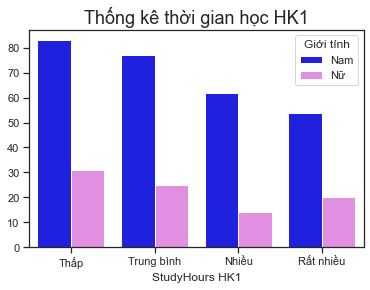

In [56]:
a=pd.DataFrame(new[new['Giới tính']=='Nam'][['Giới tính','StudyHours HK1']].value_counts())
plot=a.reset_index()
a=pd.DataFrame(new[new['Giới tính']=='Nữ'][['Giới tính','StudyHours HK1']].value_counts()).reset_index()
plot=pd.concat([plot,a])
sns.barplot(x="StudyHours HK1", y=plot[0], hue="Giới tính", data=plot,palette=['blue','violet'])
plt.title('Thống kê thời gian học HK1', size=18)
plt.ylabel('')

In [57]:
score, p_value, dof, expected = st.chi2_contingency(hours)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,2.213622,0.52927,3,Chấp nhận H0 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, biến `Giới tính` và biến `Thời gian học tập HK1 (StudyHours HK1)` là 2 biến độc lập với mức ý nghĩa 5%.

**Xét HK 2:**

In [58]:
hours = pd.crosstab(index=new['Giới tính'], columns=new['StudyHours HK2'])
hours

StudyHours HK2,Thấp,Trung bình,Nhiều,Rất nhiều
Giới tính,,,,
Nam,38,89,73,76
Nữ,12,31,16,31


Text(0, 0.5, '')

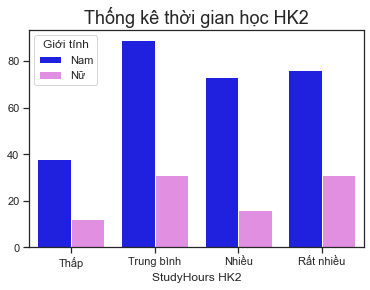

In [59]:
a=pd.DataFrame(new[new['Giới tính']=='Nam'][['Giới tính','StudyHours HK2']].value_counts())
plot=a.reset_index()
a=pd.DataFrame(new[new['Giới tính']=='Nữ'][['Giới tính','StudyHours HK2']].value_counts()).reset_index()
plot=pd.concat([plot,a])
sns.barplot(x="StudyHours HK2", y=plot[0], hue="Giới tính", data=plot,palette=['blue','violet'])
plt.title('Thống kê thời gian học HK2', size=18)
plt.ylabel('')

In [60]:
score, p_value, dof, expected = st.chi2_contingency(hours)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,3.315997,0.345422,3,Chấp nhận H0 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, biến `Giới tính` và biến `Thời gian học tập HK2 (StudyHours HK2)` là 2 biến độc lập với mức ý nghĩa 5%.

#### ***Kết luận: Về mặt thống kê, Giới tính không ảnh hưởng đến thời gian học tập (StudyHours) với mức ý nghĩa 5%.***

**________________________**

***b. Phân loại "Điểm cuối kỳ":***
![title](LetterGrade.png)

**Dùng kiểm định Chi2 để nghiên cứu sự ảnh hưởng của Giới tính đến Điểm cuối kỳ.**

In [61]:
# Phân loại "Điểm cuối kỳ":
new2 = df[['Giới tính','Điểm cuối kỳ 1','Điểm cuối kỳ 2']]
bins = []
for x in new2['Điểm cuối kỳ 1']:
  if x < 1.0: bins.append("F")
  elif 1 <= x <= 1.7: bins.append("D")
  elif 1.7 < x <= 2.7:bins.append("C")
  elif 2.7 < x <= 3.7: bins.append("B")
  else : bins.append("A")
new2['LetterGrade HK1']=bins
bins = []
for x in new2['Điểm cuối kỳ 2']:
  if x < 1.0: bins.append("F")
  elif 1 <= x <= 1.7: bins.append("D")
  elif 1.7 < x <= 2.7:bins.append("C")
  elif 2.7 < x <= 3.7: bins.append("B")
  else : bins.append("A")
new2['LetterGrade HK2']=bins
new2

,Giới tính,Điểm cuối kỳ 1,Điểm cuối kỳ 2,LetterGrade HK1,LetterGrade HK2
Mã SV,,,,,
1,Nữ,0.00,2.04,F,C
2,Nam,2.03,2.09,C,C
3,Nam,0.00,1.78,F,C
4,Nam,0.00,2.00,F,C
5,Nam,2.35,2.41,C,C
...,...,...,...,...,...
362,Nữ,0.00,2.77,F,B
363,Nam,2.05,2.13,C,C
364,Nam,2.21,2.21,C,C


**Dùng kiểm định Chi2 để nghiên cứu sự ảnh hưởng của giới tính đến LetterGrade.**

Phát biểu giả thiết:

- $H_0$: biến `Giới tính` và biến `Xếp loại học lực (LetterGrade)` là 2 biến độc lập.
- $H_1$: biến `Giới tính` và biến `Xếp loại học lực (LetterGrade)` không phải là 2 biến độc lập.

**HK1:**

In [62]:
grade = pd.crosstab(index=new2['Giới tính'], columns=new2['LetterGrade HK1'])
grade

LetterGrade HK1,A,B,C,D,F
Giới tính,,,,,
Nam,15,31,155,7,68
Nữ,2,30,28,0,30


Text(0, 0.5, '')

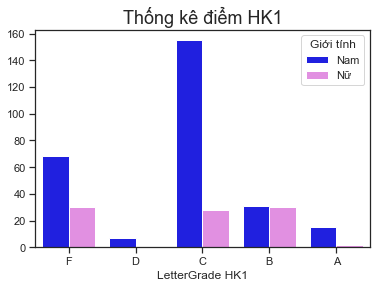

In [63]:
a=pd.DataFrame(new2[new2['Giới tính']=='Nam'][['Giới tính','LetterGrade HK1']].value_counts())
plot=a.reset_index()
a=pd.DataFrame(new2[new2['Giới tính']=='Nữ'][['Giới tính','LetterGrade HK1']].value_counts()).reset_index()
plot=pd.concat([plot,a])
plot=plot.sort_values(by=['LetterGrade HK1'],ascending=False)
sns.barplot(x="LetterGrade HK1", y=plot[0], hue="Giới tính", data=plot,palette=['blue','violet'])
plt.title('Thống kê điểm HK1', size=18)
plt.ylabel('')

In [64]:
from scipy import stats as st
score, p_value, dof, expected = st.chi2_contingency(grade)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,34.114945,7.058150e-07,4,Chấp nhận H1 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, biến `Giới tính` và biến `LetterGrade HK1` không phải là 2 biến độc lập với mức ý nghĩa 5%.

**HK2:**

In [65]:
grade = pd.crosstab(index=new2['Giới tính'], columns=new2['LetterGrade HK2'])
grade

LetterGrade HK2,A,B,C,D,F
Giới tính,,,,,
Nam,3,46,198,24,5
Nữ,3,41,43,3,0


Text(0, 0.5, '')

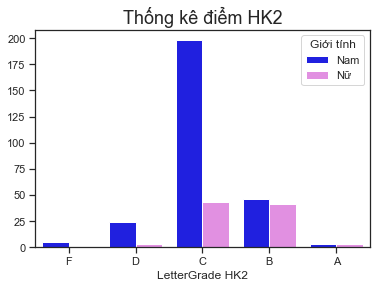

In [66]:
a=pd.DataFrame(new2[new2['Giới tính']=='Nam'][['Giới tính','LetterGrade HK2']].value_counts())
plot=a.reset_index()
a=pd.DataFrame(new2[new2['Giới tính']=='Nữ'][['Giới tính','LetterGrade HK2']].value_counts()).reset_index()
plot=pd.concat([plot,a])
plot=plot.sort_values(by=['LetterGrade HK2'],ascending=False)
sns.barplot(x="LetterGrade HK2", y=plot[0], hue="Giới tính", data=plot,palette=['blue','violet'])
plt.title('Thống kê điểm HK2', size=18)
plt.ylabel('')

In [67]:
from scipy import stats as st
score, p_value, dof, expected = st.chi2_contingency(grade)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,36.111086,2.745355e-07,4,Chấp nhận H1 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, biến `Giới tính` và biến `LetterGrade HK2` không phải là 2 biến độc lập với mức ý nghĩa 5%.

#### ***Kết luận: Về mặt thống kê, Giới tính ảnh hưởng đến Xếp loại học lực (LettGrade) với mức ý nghĩa 5%.***

**________________________**

## Có nhận định cho rằng thời gian tự học (StudyHours) có ảnh hưởng đến kết quả LetterGrade.

**Hãy kiểm chứng nhận định trên (có thể dùng Chi2 test) với mức ý nghĩa 5%.**

Phát biểu giả thiết:

- $H_0$: biến `Thời gian tự học (StudyHours)` và biến `Xếp loại học lực (LetterGrade)` là 2 biến độc lập.
- $H_1$: biến `Thời gian tự học (StudyHours)` và biến `Xếp loại học lực (LetterGrade)` không phải là 2 biến độc lập.

In [68]:
new3 = pd.concat([new[['StudyHours HK1','StudyHours HK2']], new2[['LetterGrade HK1','LetterGrade HK2']]], axis=1)
new3

,StudyHours HK1,StudyHours HK2,LetterGrade HK1,LetterGrade HK2
Mã SV,,,,
1,Thấp,Trung bình,F,C
2,Trung bình,Trung bình,C,C
3,Thấp,Thấp,F,C
4,Thấp,Trung bình,F,C
5,Rất nhiều,Rất nhiều,C,C
...,...,...,...,...
362,Thấp,Trung bình,F,B
363,Nhiều,Nhiều,C,C
364,Nhiều,Rất nhiều,C,C


**HK1:**

In [69]:
grade1 = pd.crosstab(index=new3['StudyHours HK1'], columns=new3['LetterGrade HK1'])
grade1

LetterGrade HK1,A,B,C,D,F
StudyHours HK1,,,,,
Thấp,13,2,1,0,98
Trung bình,2,27,70,3,0
Nhiều,1,14,58,3,0
Rất nhiều,1,18,54,1,0


In [70]:
score, p_value, dof, expected = st.chi2_contingency(grade1)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,341.748172,7.715194e-66,12,Chấp nhận H1 với mức ý nghĩa 0.05


 ***Kết luận:*** Về mặt thống kê,biến `Thời gian tự học HK1 (StudyHours HK1)` và biến `LetterGrade HK1` không phải là 2 biến độc lập. với mức ý nghĩa 5%.

**HK2:**

In [71]:
grade2 = pd.crosstab(index=new3['StudyHours HK2'], columns=new3['LetterGrade HK2'])
grade2

LetterGrade HK2,A,B,C,D,F
StudyHours HK2,,,,,
Thấp,1,10,22,15,2
Trung bình,2,29,77,9,3
Nhiều,1,19,68,1,0
Rất nhiều,2,29,74,2,0


In [72]:
score, p_value, dof, expected = st.chi2_contingency(grade2)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,56.761097,8.729112e-08,12,Chấp nhận H1 với mức ý nghĩa 0.05


 ***Kết luận:*** Về mặt thống kê,biến `Thời gian tự học HK2 (StudyHours HK2)` và biến `LetterGrade HK2` không phải là 2 biến độc lập. với mức ý nghĩa 5%.

***Kết luận:*** Về mặt thống kê, `Thời gian tự học(StudyHours)` ảnh hưởng đến `Xếp loại học lực (LetterGrade)` với mức ý nghĩa 5%.

## Có nhận định cho rằng điểm kiểm tra giữa kỳ có ảnh hưởng đến điểm thi cuối kỳ.

**Hãy kiểm chứng nhận xét trên với độ tin cậy 95%.**

Phát biểu giả thiết:

- $H_0$: Xếp loại học lực giữa kỳ không ảnh hưởng đến xếp loại học lực (LetterGrade).
- $H_1$: Xếp loại học lực giữa kỳ ảnh hưởng đến xếp loại học lực (LetterGrade).

***Chuyển điểm giữa kỳ thành thang điểm [A,B,C,D,F]***

In [73]:
giuaky = df[['Điểm giữa kỳ HK1','Điểm giữa kỳ HK2']]
bins = []
for x in df['Điểm giữa kỳ HK1']:
  if x < 1.0: bins.append("F")
  elif 1 <= x <= 1.7: bins.append("D")
  elif 1.7 < x <= 2.7:bins.append("C")
  elif 2.7 < x <= 3.7: bins.append("B")
  else : bins.append("A")
giuaky['Điểm giữa kỳ HK1']=bins
bins = []
for x in df['Điểm giữa kỳ HK2']:
  if x < 1.0: bins.append("F")
  elif 1 <= x <= 1.7: bins.append("D")
  elif 1.7 < x <= 2.7:bins.append("C")
  elif 2.7 < x <= 3.7: bins.append("B")
  else : bins.append("A")
giuaky['Điểm giữa kỳ HK2']=bins
giuaky = pd.concat([giuaky, new2[['LetterGrade HK1','LetterGrade HK2']]], axis=1)
giuaky

,Điểm giữa kỳ HK1,Điểm giữa kỳ HK2,LetterGrade HK1,LetterGrade HK2
Mã SV,,,,
1,C,C,F,C
2,C,D,C,C
3,D,D,F,C
4,C,B,F,C
5,B,C,C,C
...,...,...,...,...
362,B,C,F,B
363,C,C,C,C
364,C,B,C,C


**HK1:**

In [74]:
giuaky1 = pd.crosstab(index=giuaky['Điểm giữa kỳ HK1'], columns=giuaky['LetterGrade HK1'])
giuaky1

LetterGrade HK1,A,B,C,D,F
Điểm giữa kỳ HK1,,,,,
A,2,3,0,0,3
B,4,45,39,1,24
C,4,13,108,4,51
D,5,0,29,1,14
F,2,0,7,1,6


In [75]:
score, p_value, dof, expected = st.chi2_contingency(giuaky1)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,92.962887,7.094777e-13,16,Chấp nhận H1 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, `Xếp loại học lực giữa kỳ 1` ảnh hưởng đến `Xếp loại học lực cuối kỳ 1 (LetterGrade HK1)` với mức ý nghĩa 5%.

**HK2:**

In [76]:
giuaky2 = pd.crosstab(index=giuaky['Điểm giữa kỳ HK2'], columns=giuaky['LetterGrade HK2'])
giuaky2

LetterGrade HK2,A,B,C,D,F
Điểm giữa kỳ HK2,,,,,
A,3,8,0,0,0
B,3,59,41,5,0
C,0,19,149,9,1
D,0,1,39,8,3
F,0,0,12,5,1


In [77]:
score, p_value, dof, expected = st.chi2_contingency(giuaky2)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,190.713235,5.927947e-32,16,Chấp nhận H1 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, `Xếp loại học lực giữa kỳ 2` ảnh hưởng đến `Xếp loại học lực cuối kỳ 2 (LetterGrade HK2)` với mức ý nghĩa 5%.

## III. ANOVA

In [78]:
import statsmodels.api as sm
#Hàm trực quan hóa dữ liệu
def vis(data):
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (6,3))
    sns.distplot(data, ax=axes[0], color='green')
    plt.tight_layout()
    
    sm.qqplot(data,ax=axes[1], line='45')
    plt.tight_layout()
    fig.suptitle(data.name, size=18)

#Hàm chuẩn hóa    
def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std    

In [79]:
# Hàm kiểm định Shapiro và đồ thị phân phối
from scipy.stats import shapiro
import statsmodels.api as sm
def shapiro_test(data):
    stat, p = shapiro(data)
    print('Kiểm định Shapiro cho',data.name)
    print('stat=%.3f, p=%.6f' % (stat, p))
    if p > 0.05:
        print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
        print('Đủ điều kiện để phân tích tiếp')
    else:
        print('Dữ liệu không tuân theo luật phân phối chuẩn')
    print('-'*50)

In [80]:
df['Phân loại'] = df["Giới tính"] + ' - '+ df["Dân tộc"]
df.head()

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Thể thao,Thời gian tự học HK1,Điểm giữa kỳ HK1,Điểm cuối kỳ 1,Thời gian tự học HK2,Điểm giữa kỳ HK2,Điểm cuối kỳ 2,Phân loại
Mã SV,,,,,,,,,,,,,,
1,6.43,0.48,10,4,Nữ,Khác,Không,0.0,2.0,0.00,43.0,2.25,2.04,Nữ - Khác
2,5.45,0.81,123,102,Nam,Kinh,Không,28.0,2.2,2.03,43.0,1.60,2.09,Nam - Kinh
3,5.66,0.88,119,42,Nam,Kinh,Không,0.0,1.6,0.00,14.0,1.29,1.78,Nam - Kinh
4,7.55,0.80,318,31,Nam,Kinh,Không,0.0,2.0,0.00,17.0,2.73,2.00,Nam - Kinh
5,6.71,1.00,383,66,Nam,Kinh,Không,91.0,2.8,2.35,106.0,2.60,2.41,Nam - Kinh


In [81]:
#số lượng 
dantoc =pd.DataFrame(df['Phân loại'].value_counts())
dantoc.columns = ['Số lượng']
dantoc

,Số lượng
Nam - Kinh,206
Nữ - Kinh,71
Nam - Khác,70
Nữ - Khác,19


### Dùng kiểm định Anova để so sánh Điểm giữa kỳ của các nhóm Giới tính-Dân tộc

In [82]:
# tbtn = df[['Phân loại', 'Điểm TBTN']]
# tbtn = tbtn.rename(columns={"Phân loại": "Types", "Điểm TBTN": "Score"})
# tbtn.head()

In [83]:
a = df[['Phân loại', 'Điểm giữa kỳ HK1', 'Điểm giữa kỳ HK2']]
tbtn = a[['Phân loại', 'Điểm giữa kỳ HK1']].rename(columns={"Phân loại": "Types", "Điểm giữa kỳ HK1": "Score"})
a =  a[['Phân loại', 'Điểm giữa kỳ HK2']].rename(columns={"Phân loại": "Types", "Điểm giữa kỳ HK2": "Score"})
tbtn = pd.concat([tbtn,a])
tbtn.head()

,Types,Score
Mã SV,,
1,Nữ - Khác,2.0
2,Nam - Kinh,2.2
3,Nam - Kinh,1.6
4,Nam - Kinh,2.0
5,Nam - Kinh,2.8


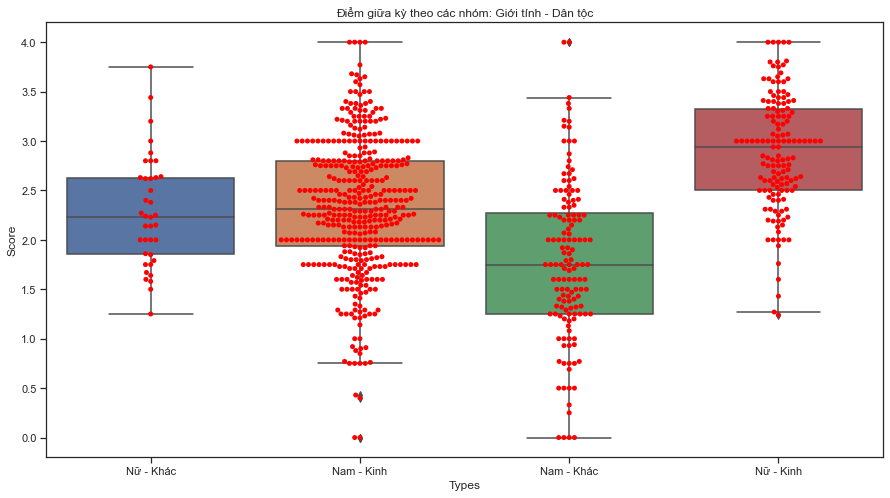

In [84]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Types', y='Score', data=tbtn)
sns.swarmplot(x="Types", y="Score", data=tbtn, color='red')
plt.title('Điểm giữa kỳ theo các nhóm: Giới tính - Dân tộc')
plt.show()

In [85]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Đây là một cách khác để kiểm định Anova (one-way) -> Cách này là tốt nhất cho Anova!!!
# Ordinary Least Squares (OLS) model
model = ols('Score ~ C(Types)', data=tbtn).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Types),84.886160,3.0,61.520858,1.857538e-35
Residual,334.830208,728.0,NaN,NaN


In [86]:
g = tbtn['Score']
grp = tbtn.groupby('Types').groups
namkinh = g[grp['Nam - Kinh']]
namkinh.name='Nam - Kinh'
namkhac = g[grp['Nam - Khác']]
namkhac.name='Nam - Khác'
nukinh = g[grp['Nữ - Kinh']]
nukinh.name='Nữ - Kinh'
nukhac = g[grp['Nữ - Khác']]
nukhac.name='Nữ - Khác'

#### Sử dụng Shapiro-Wilk test để kiểm tra Phân phối của dữ liệu 

Phát biểu giả thiết:

$H_0$: Phân phối của nhóm là chuẩn

$H_1$: Phân phối của nhóm là không chuẩn

In [87]:
# Lấy mẫu (n=30) và chuẩn hóa:
namkinh=standadize(namkinh.sample(30))
namkhac=standadize(namkhac.sample(30))
nukinh=standadize(nukinh.sample(30))
nukhac=standadize(nukhac.sample(30))

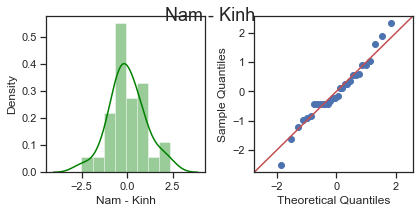

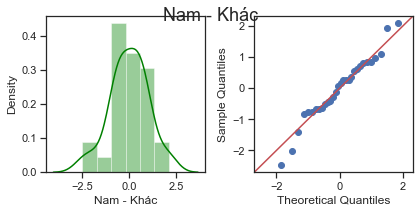

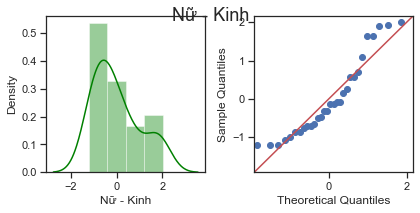

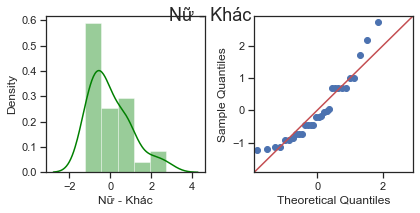

In [88]:
vis(namkinh)
vis(namkhac)
vis(nukinh)
vis(nukhac)

In [89]:
shapiro_test(namkinh)
shapiro_test(namkhac)
shapiro_test(nukinh)
shapiro_test(nukhac)

Kiểm định Shapiro cho Nam - Kinh
stat=0.977, p=0.737147
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp
--------------------------------------------------
Kiểm định Shapiro cho Nam - Khác
stat=0.974, p=0.642130
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp
--------------------------------------------------
Kiểm định Shapiro cho Nữ - Kinh
stat=0.894, p=0.006037
Dữ liệu không tuân theo luật phân phối chuẩn
--------------------------------------------------
Kiểm định Shapiro cho Nữ - Khác
stat=0.905, p=0.011192
Dữ liệu không tuân theo luật phân phối chuẩn
--------------------------------------------------


### Kiểm định tính thuần nhất phương sai (Bartlett’s Test)

Phát biểu các giả thiết:

$H_0$: Các nhóm đều có phương sai đồng nhất 

$H_1$: Có ít nhất 2 nhóm có phương sai khác nhau (lớn)

In [90]:
from scipy.stats import bartlett
bartlett = bartlett(namkinh,namkhac,nukinh,nukhac)
print(bartlett)
if bartlett.pvalue > 0.05:
    print('Không thể bác bỏ giả thiết H0: Các nhóm đồng nhất về phương sai')
else:
    print('Các nhóm không đồng nhất về phương sai')

BartlettResult(statistic=6.1291859217833e-15, pvalue=1.0)
Không thể bác bỏ giả thiết H0: Các nhóm đồng nhất về phương sai


### Kiểm định ANOVA

Phát biểu giả thiết:

- $H_0$: `Điểm giữa kỳ` giữa các nhóm `Phân loại` không có sự khác biệt
- $H_1$: `Điểm giữa kỳ` giữa các nhóm `Phân loại` có sự khác biệt

In [91]:
# Tiến hành phân tích ANOVA 1 chiều
from scipy.stats import f_oneway

anova = f_oneway(namkinh,namkhac,nukinh,nukhac)
print(anova)
alpha = 0.05
if (anova.pvalue < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng Điểm Giữa kỳ giữa các nhóm có sự khác biệt')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng Điểm Giữa kỳ giữa các nhóm không có sự khác biệt.')

F_onewayResult(statistic=1.9376313811480142e-29, pvalue=1.0)
Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng Điểm Giữa kỳ giữa các nhóm không có sự khác biệt.


***Hậu kiểm định ANOVA:***

In [92]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=tbtn['Score'],
                          groups=tbtn['Types'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Nam - Khác,Nam - Kinh,0.5402,0.001,0.3694,0.711,True
Nam - Khác,Nữ - Khác,0.4944,0.001,0.175,0.8138,True
Nam - Khác,Nữ - Kinh,1.0966,0.001,0.8886,1.3046,True
Nam - Kinh,Nữ - Khác,-0.0458,0.9,-0.3419,0.2503,False
Nam - Kinh,Nữ - Kinh,0.5564,0.001,0.3864,0.7263,True
Nữ - Khác,Nữ - Kinh,0.6022,0.001,0.2832,0.9211,True


# Câu 7

Tạo một cột nối Giới tính và Dân tộc (ví dụ Nam-Kinh; Nữ-Kinh; Nam-Khác; Nữ Khác) và  dùng kiểm định Anova để so sánh điểm trung bình kết thúc học kỳ của các nhóm Giới tính Dân tộc ở trên.

## Hướng kiểm định tham số: (Kiểm định ANOVA)

In [93]:
a = df[['Phân loại', 'Điểm cuối kỳ 1', 'Điểm cuối kỳ 2']]
a.head()

,Phân loại,Điểm cuối kỳ 1,Điểm cuối kỳ 2
Mã SV,,,
1,Nữ - Khác,0.00,2.04
2,Nam - Kinh,2.03,2.09
3,Nam - Kinh,0.00,1.78
4,Nam - Kinh,0.00,2.00
5,Nam - Kinh,2.35,2.41


In [94]:
#Gộp lại
a = df[['Phân loại', 'Điểm cuối kỳ 1']].rename(columns={"Phân loại": "Types", "Điểm cuối kỳ 1": "Score"})
b = df[['Phân loại', 'Điểm cuối kỳ 2']].rename(columns={"Phân loại": "Types", "Điểm cuối kỳ 2": "Score"})
a = pd.concat([a,b])
a.head()

,Types,Score
Mã SV,,
1,Nữ - Khác,0.00
2,Nam - Kinh,2.03
3,Nam - Kinh,0.00
4,Nam - Kinh,0.00
5,Nam - Kinh,2.35


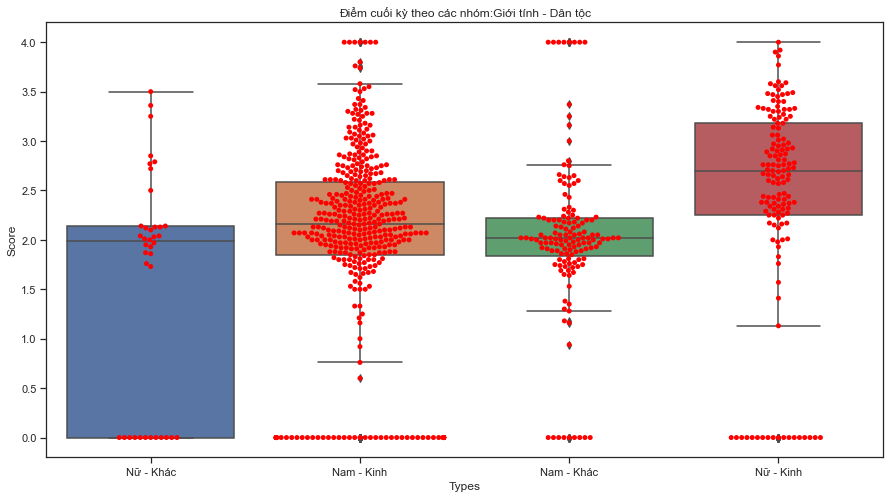

In [95]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Types', y='Score', data=a)
sns.swarmplot(x="Types", y="Score", data=a, color='red')
plt.title('Điểm cuối kỳ theo các nhóm:Giới tính - Dân tộc')
plt.show()

In [96]:
g = a['Score']
grp = a.groupby('Types').groups
namkinh = g[grp['Nam - Kinh']]
namkinh.name='Nam - Kinh'
namkhac = g[grp['Nam - Khác']]
namkhac.name='Nam - Khác'
nukinh = g[grp['Nữ - Kinh']]
nukinh.name='Nữ - Kinh'
nukhac = g[grp['Nữ - Khác']]
nukhac.name='Nữ - Khác'

#### Sử dụng Shapiro-Wilk test để kiểm tra Phân phối của dữ liệu 

Phát biểu giả thiết:

$H_0$: Phân phối của nhóm là chuẩn

$H_1$: Phân phối của nhóm là không chuẩn

Lấy mẫu (n=30) và chuẩn hóa dữ liệu:

In [97]:
namkinh=standadize(namkinh.sample(30))
namkhac=standadize(namkhac.sample(30))
nukinh=standadize(nukinh.sample(30))
nukhac=standadize(nukhac.sample(30))

Trực quan hóa:

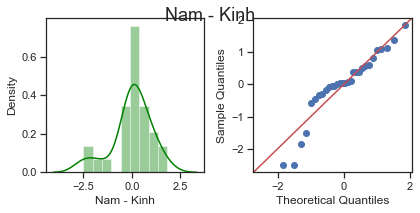

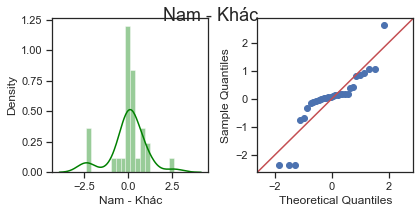

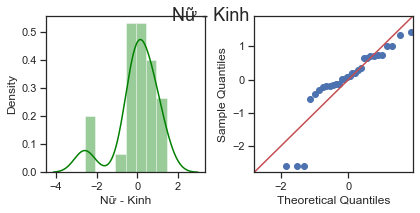

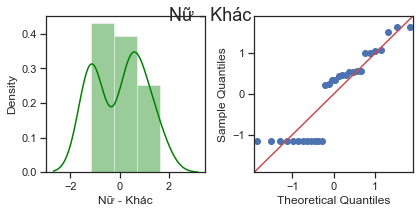

In [98]:
vis(namkinh)
vis(namkhac)
vis(nukinh)
vis(nukhac)

In [99]:
shapiro_test(namkinh)
shapiro_test(namkhac)
shapiro_test(nukinh)
shapiro_test(nukhac)

Kiểm định Shapiro cho Nam - Kinh
stat=0.906, p=0.011843
Dữ liệu không tuân theo luật phân phối chuẩn
--------------------------------------------------
Kiểm định Shapiro cho Nam - Khác
stat=0.846, p=0.000522
Dữ liệu không tuân theo luật phân phối chuẩn
--------------------------------------------------
Kiểm định Shapiro cho Nữ - Kinh
stat=0.822, p=0.000166
Dữ liệu không tuân theo luật phân phối chuẩn
--------------------------------------------------
Kiểm định Shapiro cho Nữ - Khác
stat=0.827, p=0.000215
Dữ liệu không tuân theo luật phân phối chuẩn
--------------------------------------------------


**=>Vì dữ liệu không tuân theo phân phối chuẩn nên không thể tiếp tục tiến hành kiểm định ANOVA (parametric).**

## Kiểm định phi tham số (kiểm định Kruskal)

Kiểm định Kruskal-Wallis được sử dụng để đánh giá sự khác nhau về giá trị trung bình của một biến phụ thuộc theo 2 hay nhiều nhóm của biến độc lập (dạng phân loại), nhưng không yêu cầu biến phụ thuộc phải có phân phối chuẩn

In [100]:
def results(p, vals=[], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

### Kiểm định Kruskal-Wallis:

Phát biểu giả thiết:

- $H_0$ : `Điểm cuối học kỳ` giữa các nhóm thuộc biến `Phân loại` không có sự khác biệt 
- $H_1$ : `Điểm cuối học kỳ` giữa các nhóm thuộc biến `Phân loại` có sự khác biệt 

In [101]:
data = [a.loc[i, 'Score'].values for i in a.groupby('Types').groups.values()]

In [102]:
from scipy.stats import kruskal
# compare samples
p = {}
p['score'], p['p_value'] = kruskal(*data)
results(p)

,score,p_value,KetLuan
,127.031101,2.359508e-27,Chấp nhận H1 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, `Điểm cuối học kỳ` giữa các nhóm thuộc biến `Phân loại` không có sự khác biệt với mức ý nghĩa 5%.

***Hậu kiểm:***
https://pythonrepo.com/repo/maximtrp-scikit-posthocs-python-science-and-data-analysis

Bảng Posthoc

In [103]:
import scikit_posthocs as sp
sp.posthoc_conover(a, val_col='Score', group_col='Types', p_adjust = 'holm')

,Nam - Khác,Nam - Kinh,Nữ - Khác,Nữ - Kinh
Nam - Khác,1.000000e+00,4.134393e-02,3.297584e-01,3.892431e-12
Nam - Kinh,4.134393e-02,1.000000e+00,4.134393e-02,7.770558e-10
Nữ - Khác,3.297584e-01,4.134393e-02,1.000000e+00,5.211896e-08
Nữ - Kinh,3.892431e-12,7.770558e-10,5.211896e-08,1.000000e+00
